# IRIS EDA & K-Means Clustering

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
iris = pd.read_csv("C:\\Users\\nkart\\Downloads\\Iris.csv")
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


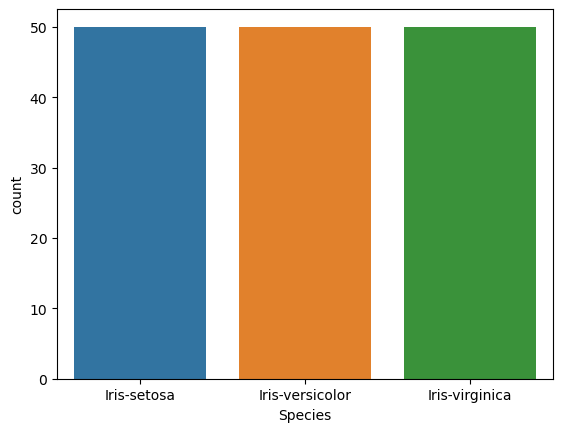

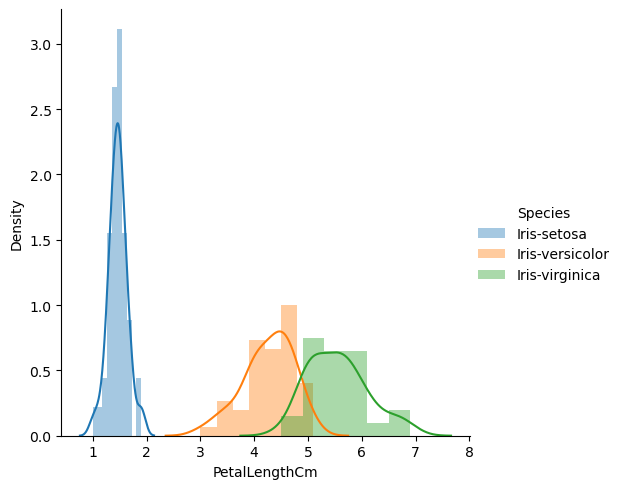

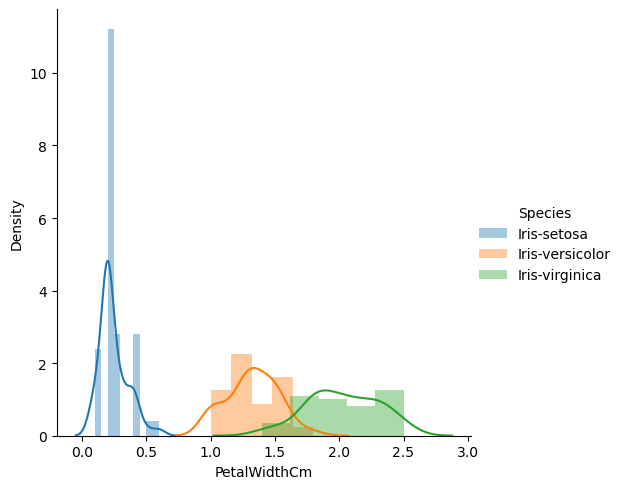

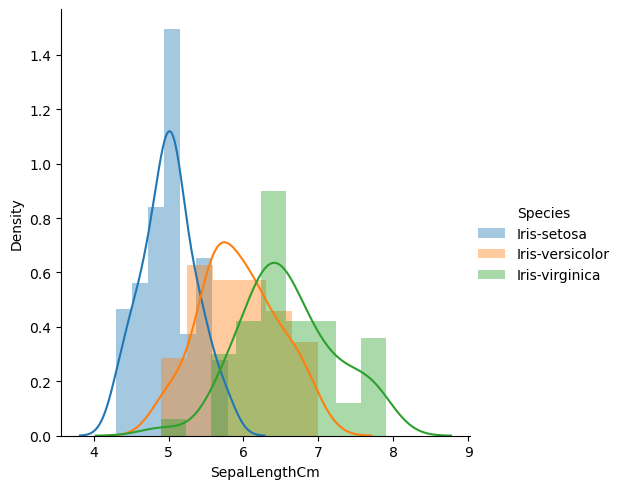

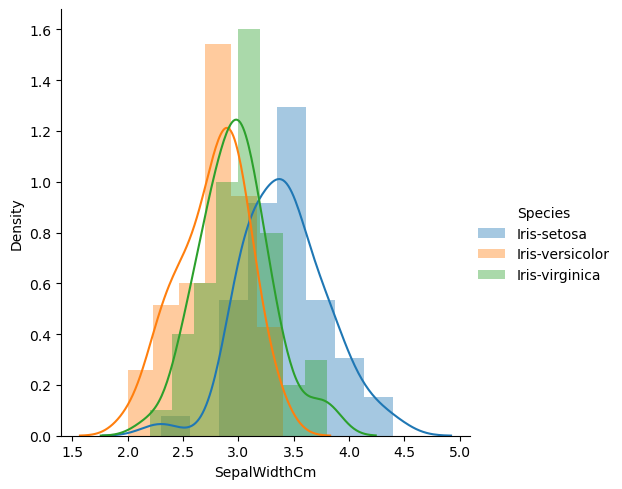

In [5]:
iris.tail(5)
iris.shape
iris.info()
iris['Species'].value_counts()
sns.countplot(x='Species', data=iris)
plt.show()
sns.FacetGrid(iris,hue="Species",height=5).map(sns.distplot,"PetalLengthCm").add_legend();
sns.FacetGrid(iris,hue="Species",height=5).map(sns.distplot,"PetalWidthCm").add_legend();
sns.FacetGrid(iris,hue="Species",height=5).map(sns.distplot,"SepalLengthCm").add_legend();
sns.FacetGrid(iris,hue="Species",height=5).map(sns.distplot,"SepalWidthCm").add_legend();


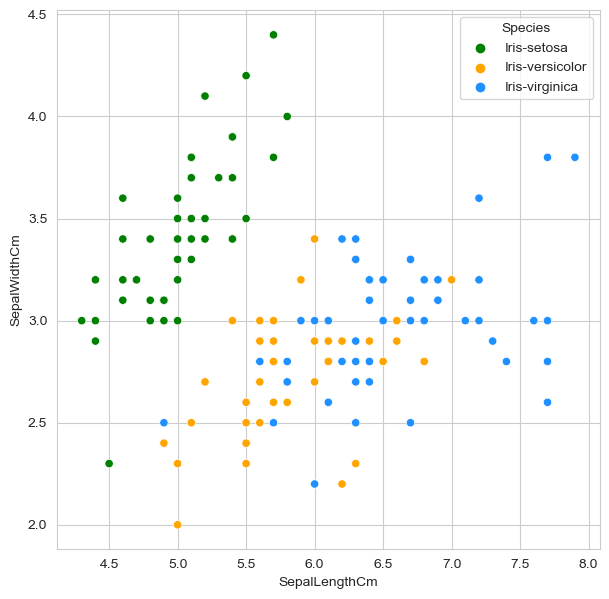

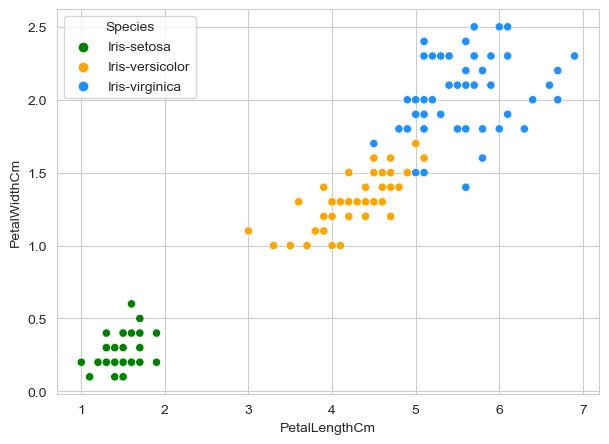

<Figure size 700x700 with 0 Axes>

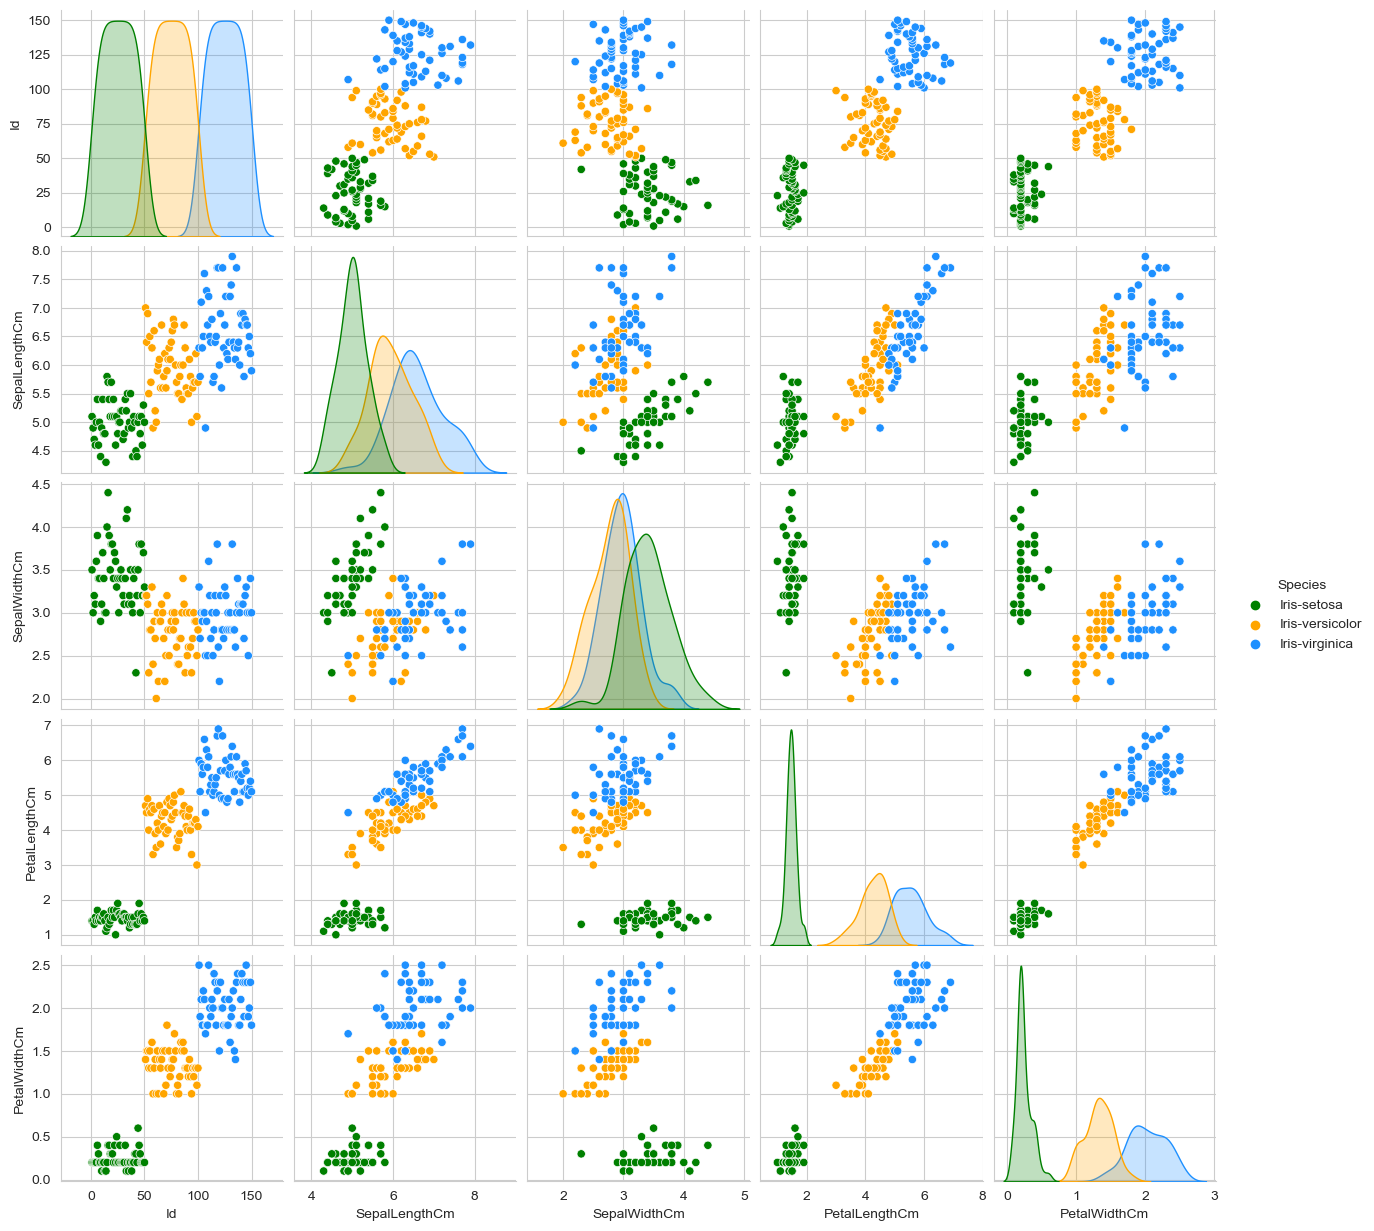

In [6]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.scatterplot(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'], hue=iris['Species'], palette=['green','orange','dodgerblue'])
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.scatterplot(x=iris['PetalLengthCm'], y=iris['PetalWidthCm'], hue=iris['Species'], palette=['green','orange','dodgerblue'])
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.pairplot(data=iris, hue='Species', palette=['green','orange','dodgerblue'])

## Modelling with K-Means Clustering

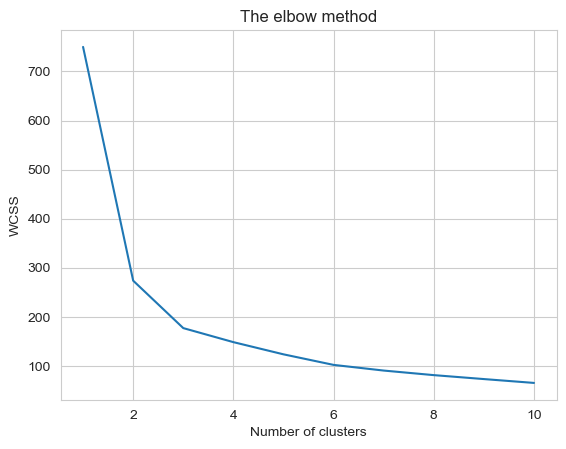

In [7]:
x = iris.drop(['Species'],axis=1)
y = iris.Species
iris.describe()
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
centroids=kmeans.cluster_centers_
centroids

array([[-1.1547262 , -1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 1.14317894,  1.03542672, -0.07079946,  1.04224753,  1.09269889],
       [ 0.07560189,  0.03894137, -0.73184462,  0.30676007,  0.21508647]])

In [11]:
iris1=iris.copy()
iris1["Species"]=iris1["Species"].map({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2}).astype(int)
iris1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


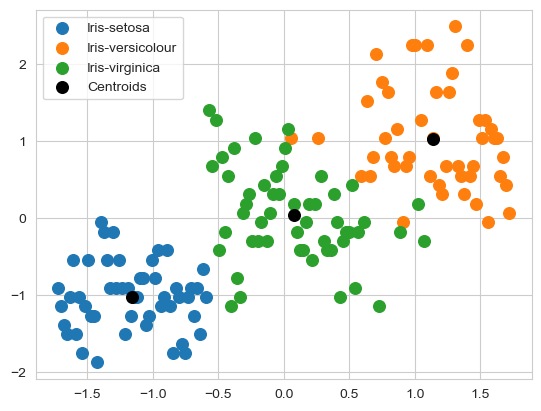

In [12]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 70, label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 70, label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 70, label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 70, c = 'black', label = 'Centroids')

plt.legend()

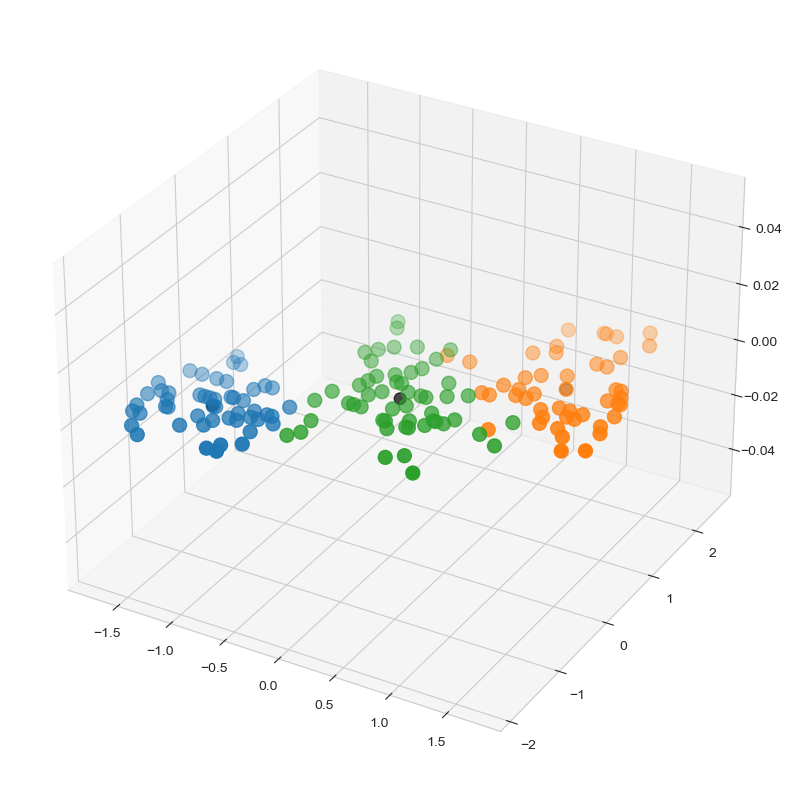

In [13]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 70, c = 'black', label = 'Centroids')
plt.show()